# **Heart Disease Prediction using SVM**

## **About Dataset**



Penyakit kardiovaskular (CVD) merupakan penyebab kematian nomor 1 secara global, merenggut sekitar 17,9 juta jiwa setiap tahunnya, atau menyumbang 31% dari seluruh kematian di seluruh dunia. Empat dari kematian 5CVD disebabkan oleh serangan jantung dan stroke, dan sepertiga dari kematian ini terjadi sebelum waktunya pada orang di bawah usia 70 tahun. Gagal jantung adalah kejadian umum yang disebabkan oleh penyakit kardiovaskular dan kumpulan data ini berisi 11 fitur yang dapat digunakan untuk memprediksi kemungkinan penyakit jantung.

Orang dengan penyakit kardiovaskular atau yang memiliki risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada) memerlukan deteksi dan manajemen dini sehingga model pembelajaran mesin SVM ini dapat sangat membantu.

## **Attribute Information**

- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv(r'heartdisease.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## **Mengetahui Dimensi DataFrame**

In [3]:
data.shape

(918, 12)

Terdiri dari 918 baris dan 12 kolom

## **Memanggil fungsi deskriptif (df.describe())**

In [4]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


df.describe() akan menghitung statistik deskriptif seperti jumlah entri, rata-rata, standar
deviasi, nilai minimum dan maksimum, serta kuartil dari setiap kolom numerik pada
DataFrame heartdiseas

## **Mengecek Missing Value**

In [5]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

 Dari hasil pengecekan, terlihat bahwa tidak ditemukan nilai null
pada data Heartdisease.


## **Mengatur Tampilan Visual Plot menggunakan Gaya FiveThirtyEight.**

In [6]:
plt.style.use('fivethirtyeight')

## **Membuat tiga grafik distribusi (dalam bentuk histogram) dari variabel "Age", "RestingBP", dan "FastingBS".**

<ipython-input-7-f2c42caacff5>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x] , bins = 20)
<ipython-input-7-f2c42caacff5>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x] , bins = 20)
<ipython-input-7-f2c42caacff5>:7: UserWarning: 

`distplot` is a deprecated function and will 

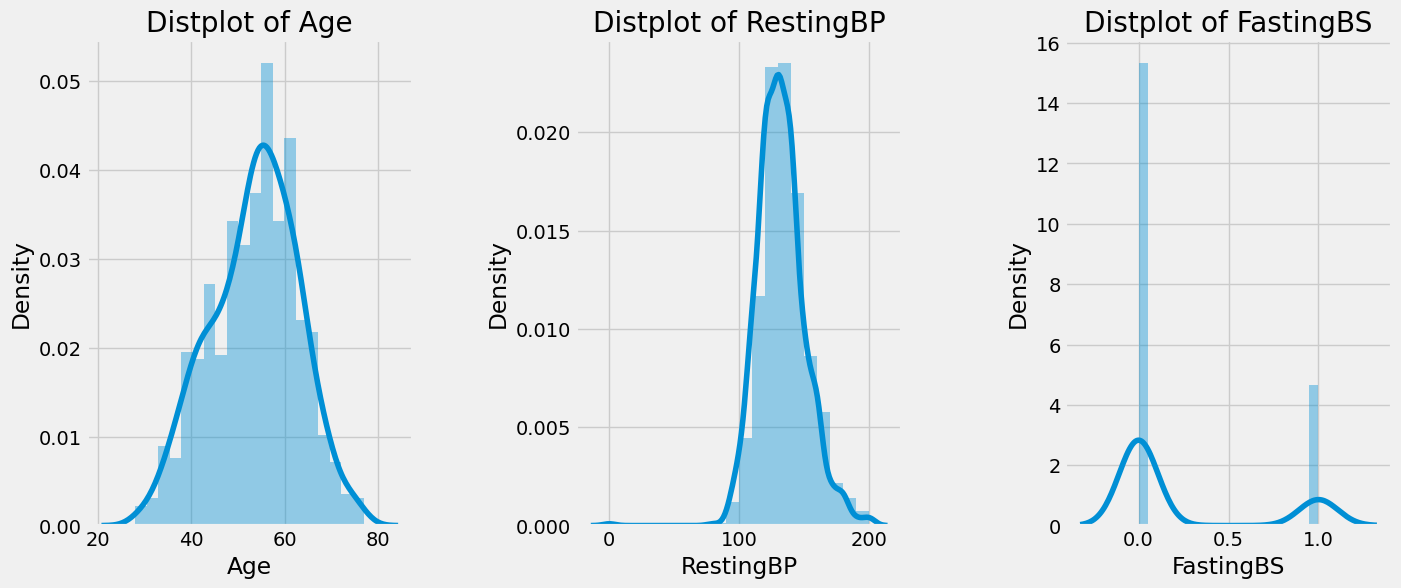

In [7]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Age' , 'RestingBP' , 'FastingBS']:
  n += 1
  plt.subplot(1 , 3 , n)
  plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
  sns.distplot(data[x] , bins = 20)
  plt.title('Distplot of {}'.format(x))

plt.show()

## **Membuat matriks scatter plot yang menunjukkan hubungan antara tiga variabel numerik, yaitu "Age", "RestingBP", dan "FastingBS".**

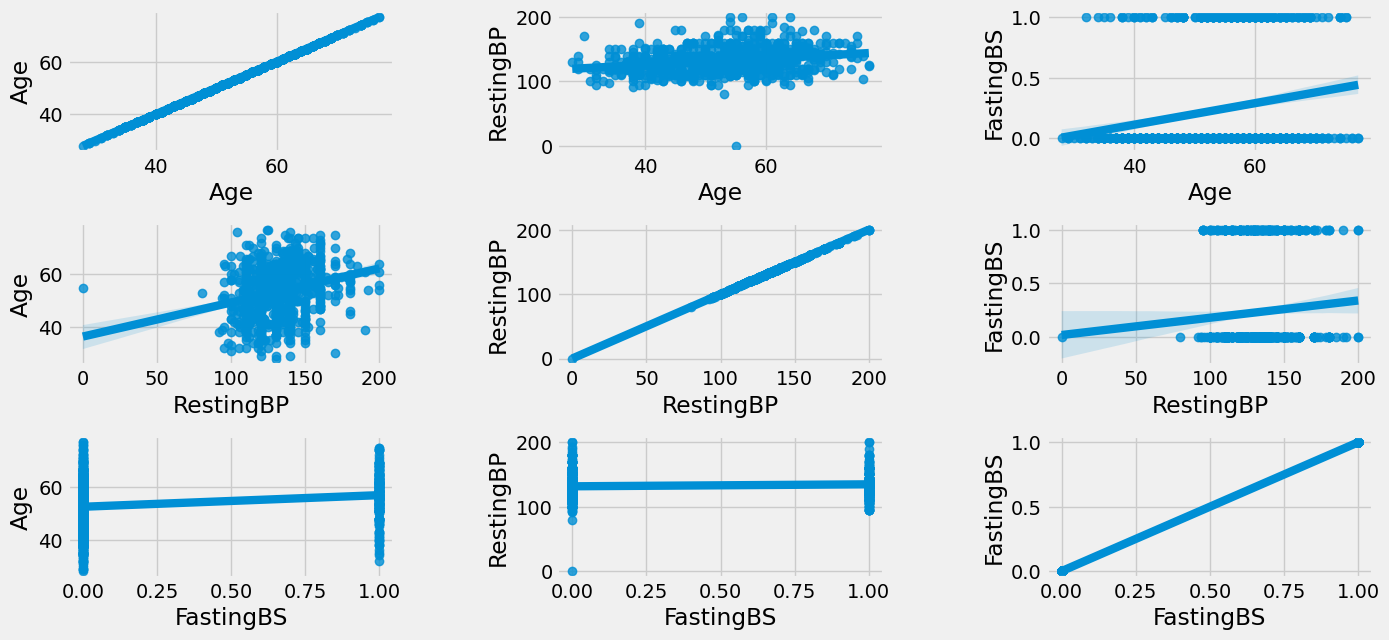

In [8]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for x in ['Age' , 'RestingBP' , 'FastingBS']:
  for y in ['Age' , 'RestingBP' , 'FastingBS']:
    n += 1
    plt.subplot(3 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.regplot(x = x , y = y , data = data)
    plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

## **Membuat scatter plot yang menunjukkan hubungan antara variabel "Age" dan "RestingBP" terhadap jenis kelamin.**

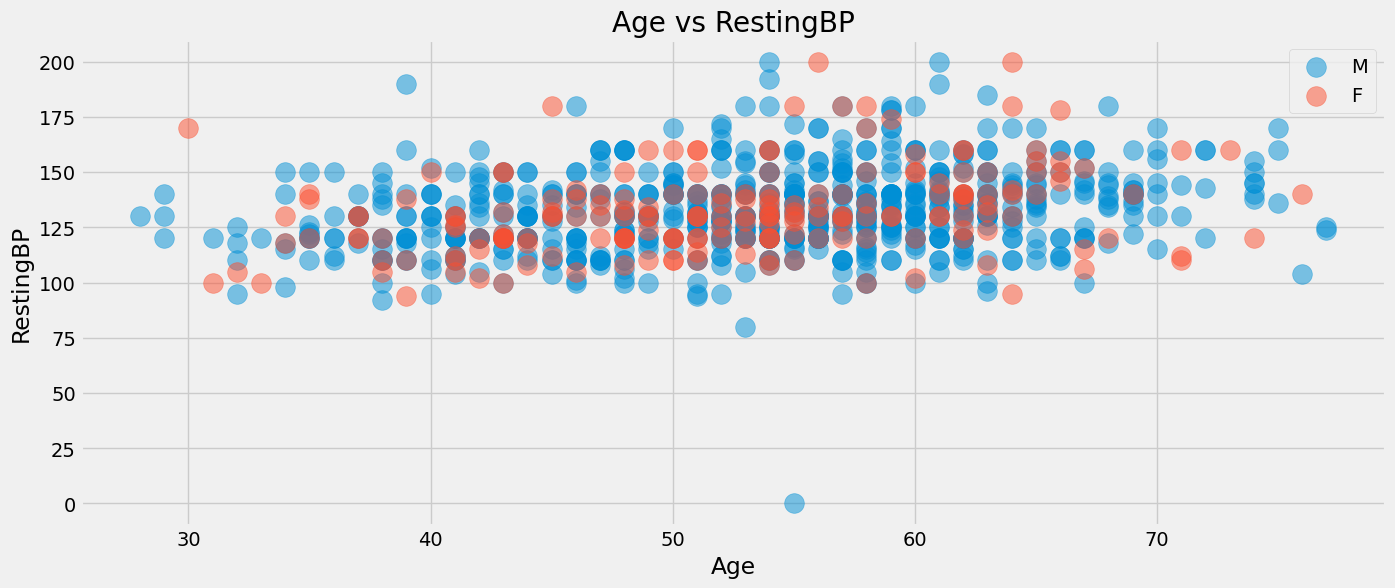

In [9]:
plt.figure(1 , figsize = (15 , 6))
for Sex in ['M' , 'F']:
  plt.scatter(x = 'Age',y = 'RestingBP' ,
  data = data[data['Sex'] == Sex] ,s = 200 , alpha = 0.5 ,
  label = Sex)
  plt.xlabel('Age'), plt.ylabel('RestingBP')
  plt.title('Age vs RestingBP')
  plt.legend()
plt.show()

## **Clustering menggunakan metode KMeans pada data yang dipilih dan menentukan jumlah cluster yang optimal berdasarkan metode elbow plot**

In [10]:
X1 = data[['Age' , 'FastingBS']].iloc[: ,:].values
inertia = []
for n in range(1 , 11):
  algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10,max_iter=300,random_state= 111) )
  algorithm.fit(X1)
  inertia.append(algorithm.inertia_)

## **Membuat elbow plot dari hasil clustering menggunakan metode KMeans**

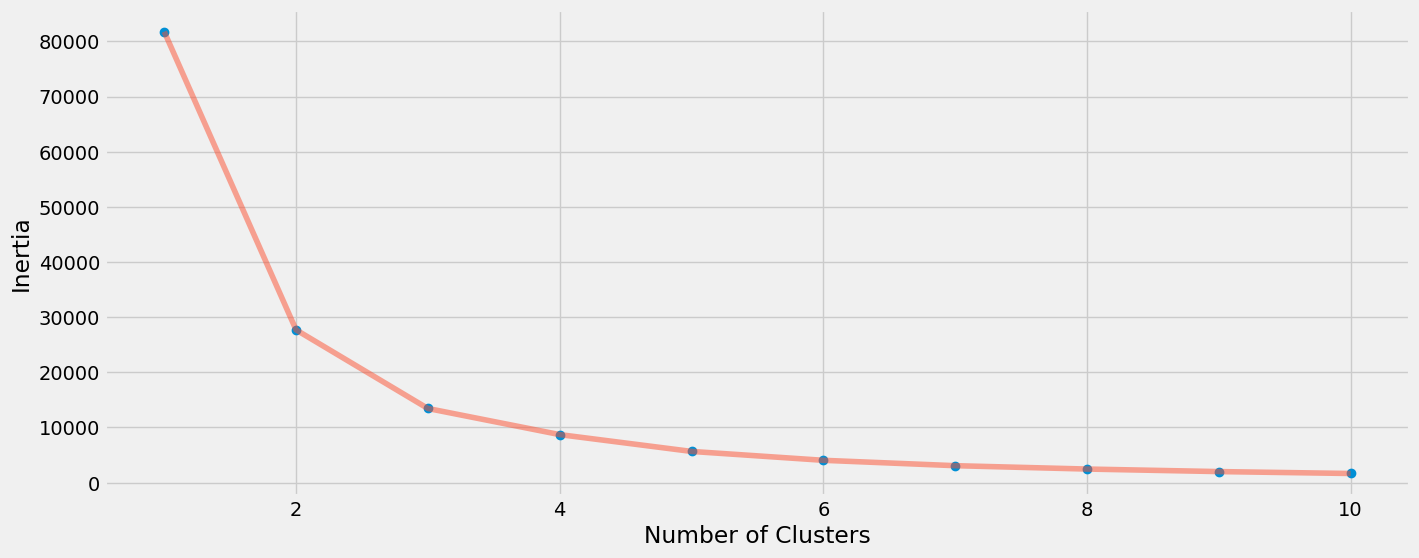

In [11]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Diperoleh bahwa jumlah clustering terbaik adalah 2 clustering

## **Pengelompokan pada data dengan menggunakan algoritma KMeans**


In [12]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 111 , algorithm='elkan') )
algorithm.fit(X1)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

## **Menyiapkan data untuk plot dan imshow**

In [13]:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_
step = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min,
y_max, step))
Z1 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

## **Membuat sebaran variabel Age' versus 'FastingBP' dari dataset menggunakan algoritme pengelompokan K-means**

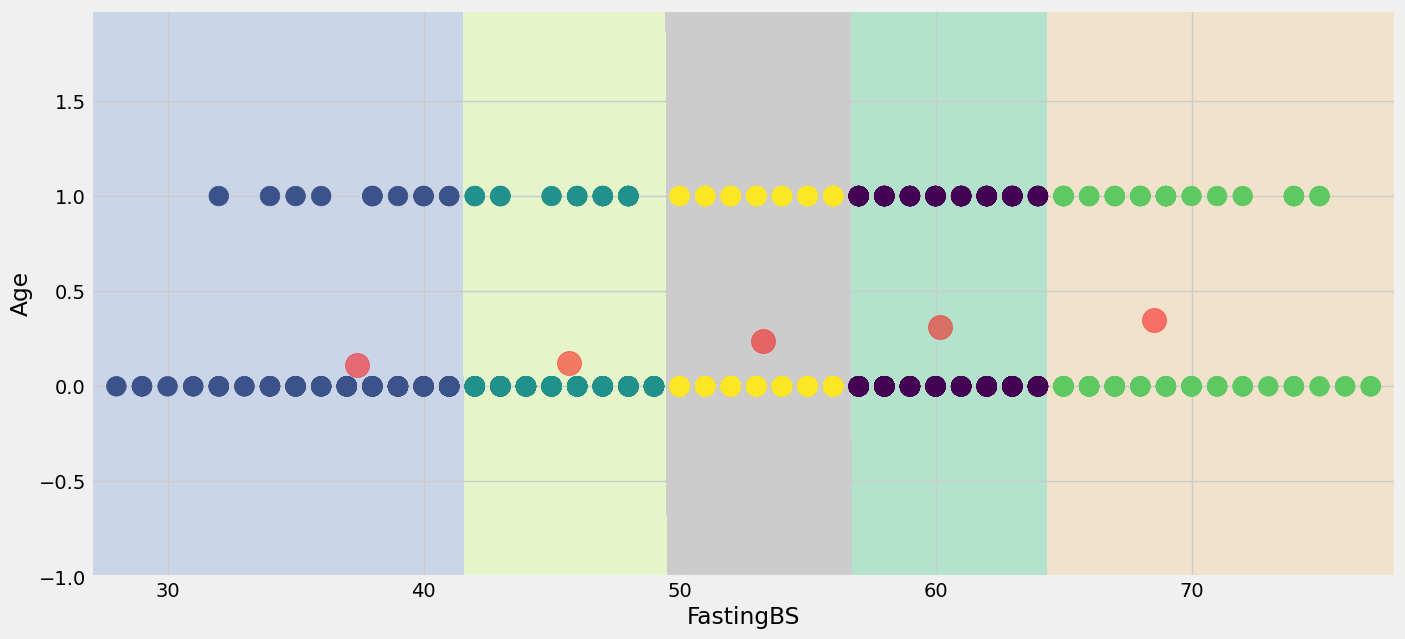

In [14]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z1 = Z1.reshape(xx.shape)
plt.imshow(Z1 , interpolation='nearest',
extent=(xx.min(), xx.max(), yy.min(), yy.max()),
cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'Age' ,y = 'FastingBS' , data = data , c = labels2 ,s = 200 )
plt.scatter(x = centroids2[: , 0] , y = centroids2[: , 1] , s = 300 , c ='red' ,alpha = 0.5)
plt.ylabel('Age') , plt.xlabel('FastingBS')
plt.show()

Cluster yang dihasilkan diplot dalam warna yang berbeda dan centroid dari setiap cluster ditandai dengan warna merah.

## **Memprediksi data**

In [15]:
data = [[150, 200],[150, 300], [240, 365]]
print(data)
print(algorithm.predict(data))

[[150, 200], [150, 300], [240, 365]]
[3 3 3]


Dari data tiga observasi yang dimasukkan memiliki hasil prediksi kelas clustering "3"